### The project on Health Insurance Dataset. 
#### The goal is to explore how different features influence on the coast of treatment(parameter "charges"), and try to create the best prediction model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline



#### Firstly we need to create DataFrame from csv file. Look on it and find some statistics indicators.


In [3]:
data = pd.read_csv("insurance.csv")
df=data.copy()

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### So there are 7 features: 3 of categorical and of 4 numeric data. The "charges" feature is numeric, that means that it's regression problem. There is no "Nan" objects in it.
#### After let's encode categorical features to create the heatmap of dataset. It can show the correlation between different parameters.


In [7]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)


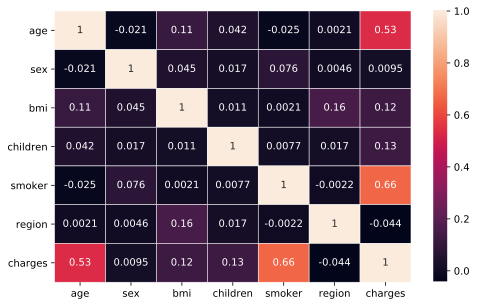

In [8]:
f, ax = plt.subplots(figsize=(8, 5))

sns.heatmap(df_encoded.corr(), annot = True, linewidths=.5)


#### The heatmap shows strong correlation between "charges" as goal feature and "age", "smoker" as features we should look closely. Other parameters doesn't have such value but let's make some dashboards to make sure of it.
                                            


Text(0.5, 1.0, 'Correlation between Age, Sex and Charges')

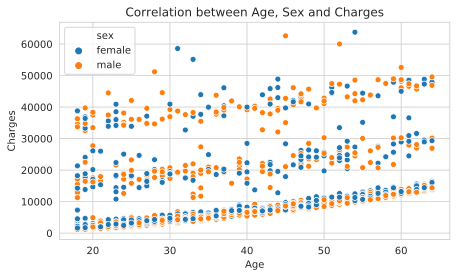

In [9]:
sns.set_style("whitegrid")


plt.figure(figsize = (7,4))
sns.scatterplot(x = "age", y = "charges", data = df, hue = "sex")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Correlation between Age, Sex and Charges")


#### The charges  feature increases with  age. We can see it on scatterplot and joinplot. There is no strong correlation with gender.

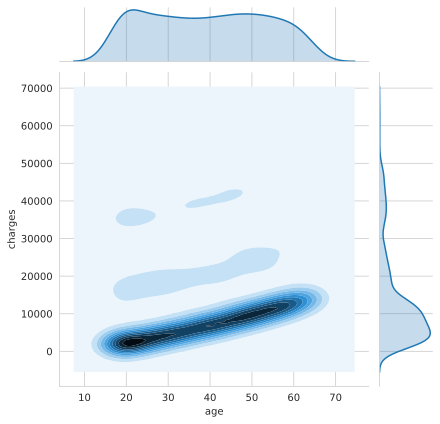

In [10]:
g = sns.jointplot(x="age", y="charges", data = df,kind="kde")

#### Charges for smokers are greater but there are more non-smokers than smokers.

Text(0.5, 0.98, 'Distribution of charges for smokers and non-smokers')

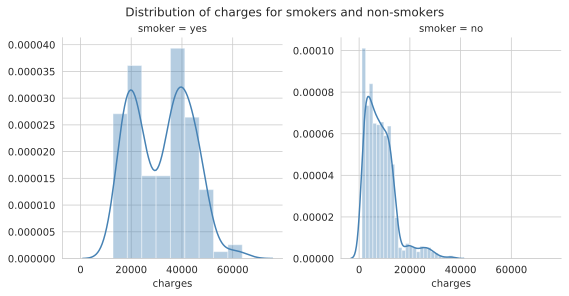

In [11]:
g = sns.FacetGrid(df, col="smoker", sharey=False, size=4)

g.map(sns.distplot, "charges", color="steelblue")
g.fig.suptitle('Distribution of charges for smokers and non-smokers',verticalalignment="bottom")


#### It's doesn't seems like bma feature has some influense on charges. The age parameter we discussed earlier. And each plot tell's about strong influense of smoke feature.

Text(0, 0.5, 'Charges')

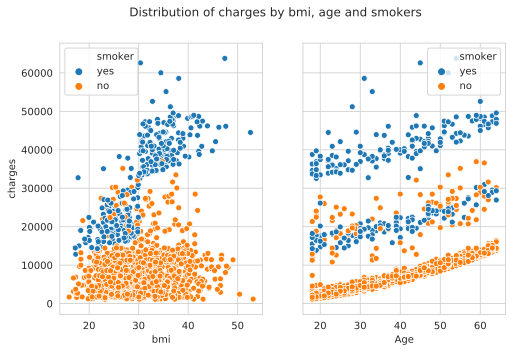

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8,5))

sns.scatterplot(x = "bmi", y = "charges", data = df, hue = "smoker",ax=axes[0])
plt.xlabel("bmi")
plt.ylabel("Charges")
_.suptitle('Distribution of charges by bmi, age and smokers', fontsize=12)

sns.scatterplot(x = "age", y = "charges", data = df, hue = "smoker",ax=axes[1])
plt.xlabel("Age")
plt.ylabel("Charges")



#### The boxplots of region and children shows that it doesn't influence on charges.

Text(0.5, 0.98, 'Distribution of charges by region and children')

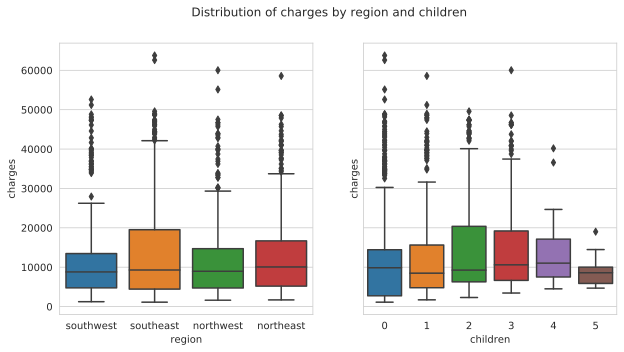

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
sns.boxplot(x = "region", y = "charges",data = df,ax=axes[0]);
sns.boxplot(x = "children", y = "charges",data = df);
_.suptitle('Distribution of charges by region and children', fontsize=12)


###  The conclusion of Data visualisation. As showed correlation matrix: "smoker" feature has the greatest influence on "charges". To solve the objective of regression, we should look on this first of all . But it looks like we cant ignore the other parameters due to small amount of  it.

#### Now it's time to create models. But first create dummy variables.

In [14]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['charges'])
y = df['charges']

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.20,random_state=0)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_y)

coefficients = lr.coef_

feature_importance = pd.Series(coefficients,
                               index=train_X.columns).abs().sort_values(ascending = False)
feature_importance

smoker_yes          11802.508634
smoker_no           11802.508634
region_northeast      483.840068
children              436.910121
region_southeast      429.438766
bmi                   335.962814
region_southwest      278.108638
age                   253.700500
region_northwest      223.707336
sex_female              7.731864
sex_male                7.731864
dtype: float64

In [17]:
lr_pred_y = lr.predict(test_X)
lr_mse = mean_squared_error(test_y, lr_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(lr_mse, np.math.sqrt(lr_mse),r2_score(test_y,lr_pred_y)))




Model mse: 3.18e+07, Model Rmse: 5.64e+03, Model r2: 0.7999876970680434


In [51]:
lr_cv = cross_val_score(lr, X, y, cv = 10)

print("Accuracy: {:.3} (+/-{:.3})".format(lr_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.745 (+/-0.0859)


Так как модель не переобучена нет смысла использовать регуляризацию и продолжать с моделью линейной регрессии.


In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(train_X)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, train_y)

X1=poly_features.fit_transform(X)
rf_cv = cross_val_score(poly_model, X1, y, cv = 7)
rf_cv.mean()



0.7627569990946272

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10).fit(train_X, train_y)

rf_pred_y = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, rf_pred_y)
print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(rf_mse, np.math.sqrt(rf_mse),r2_score(test_y,rf_pred_y)))



Model mse: 1.88e+07, Model Rmse: 4.33e+03, Model r2: 0.8821638826991961


In [21]:
rf_cv = cross_val_score(rf, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(rf_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.825 (+/-0.0786)


In [22]:
"""from sklearn.model_selection import GridSearchCV

hyperparameters = {'bootstrap': [True,False],
                   "max_depth": [3,5,10,20],
                   "max_features": ['auto', 'sqrt'],
                   "min_samples_leaf": [3,5,7],
                   "min_samples_split": [3,5,8],
                   "n_estimators": [50,100,150,200]
}


grid_search = GridSearchCV(estimator = rf, param_grid = hyperparameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(train_X, train_y)"""


'from sklearn.model_selection import GridSearchCV\n\nhyperparameters = {\'bootstrap\': [True,False],\n                   "max_depth": [3,5,10,20],\n                   "max_features": [\'auto\', \'sqrt\'],\n                   "min_samples_leaf": [3,5,7],\n                   "min_samples_split": [3,5,8],\n                   "n_estimators": [50,100,150,200]\n}\n\n\ngrid_search = GridSearchCV(estimator = rf, param_grid = hyperparameters, \n                          cv = 3, n_jobs = -1, verbose = 2)\n\ngrid_search.fit(train_X, train_y)'

In [23]:
"""best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)"""

'best_params = grid_search.best_params_\nbest_score = grid_search.best_score_\nprint(best_params)\nprint(best_score)'

In [24]:
best_params={'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}

In [25]:
"""import xgboost 

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

best_xgb_model.fit(train_X,train_y)

xg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))"""

'import xgboost \n\nbest_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,\n                 gamma=0,                 \n                 learning_rate=0.07,\n                 max_depth=3,\n                 min_child_weight=1.5,\n                 n_estimators=10000,                                                                    \n                 reg_alpha=0.75,\n                 reg_lambda=0.45,\n                 subsample=0.6,\n                 seed=42)\n\nbest_xgb_model.fit(train_X,train_y)\n\nxg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)\n\nprint("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))'

In [26]:
"""from sklearn.model_selection import GridSearchCV


parameters_for_testing = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)
    
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=1,scoring='neg_mean_squared_error')
gsearch1.fit(train_X,train_y)

print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)"""

"from sklearn.model_selection import GridSearchCV\n\n\nparameters_for_testing = {\n        'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5]\n        }\nxgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,\n    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)\n    \ngsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=1,scoring='neg_mean_squared_error')\ngsearch1.fit(train_X,train_y)\n\nprint('best params')\nprint (gsearch1.best_params_)\nprint('best score')\nprint (gsearch1.best_score_)"

In [27]:
"""import xgboost 
from sklearn.model_selection import cross_val_score

best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.6,
                 gamma=0.5,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=10,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=1,
                 seed=42)

best_xgb_model.fit(train_X,train_y)

xg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))"""

'import xgboost \nfrom sklearn.model_selection import cross_val_score\n\nbest_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.6,\n                 gamma=0.5,                 \n                 learning_rate=0.07,\n                 max_depth=3,\n                 min_child_weight=10,\n                 n_estimators=10000,                                                                    \n                 reg_alpha=0.75,\n                 reg_lambda=0.45,\n                 subsample=1,\n                 seed=42)\n\nbest_xgb_model.fit(train_X,train_y)\n\nxg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)\n\nprint("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))'

In [28]:
"""from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}
best_xgb_model = xgboost.XGBRegressor()
n_iter_search = 20
random_search = RandomizedSearchCV(best_xgb_model, param_distributions=parameters_for_testing,
                                   n_iter=n_iter_search)
random_search.fit(X, y)"""



"from sklearn.model_selection import GridSearchCV, RandomizedSearchCV\nparameters_for_testing = {\n    'colsample_bytree':[0.4,0.6,0.8],\n    'gamma':[0,0.03,0.1,0.3],\n    'min_child_weight':[1.5,6,10],\n    'learning_rate':[0.1,0.07],\n    'max_depth':[3,5],\n    'n_estimators':[10000],\n    'reg_alpha':[1e-5, 1e-2,  0.75],\n    'reg_lambda':[1e-5, 1e-2, 0.45],\n    'subsample':[0.6,0.95]  \n}\nbest_xgb_model = xgboost.XGBRegressor()\nn_iter_search = 20\nrandom_search = RandomizedSearchCV(best_xgb_model, param_distributions=parameters_for_testing,\n                                   n_iter=n_iter_search)\nrandom_search.fit(X, y)"

In [29]:
"""best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.6,
                 gamma=0.1,                 
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.95,
                 seed=42)

best_xgb_model.fit(train_X,train_y)

xg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))"""

'best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.6,\n                 gamma=0.1,                 \n                 learning_rate=0.07,\n                 max_depth=5,\n                 min_child_weight=1.5,\n                 n_estimators=10000,                                                                    \n                 reg_alpha=0.75,\n                 reg_lambda=0.45,\n                 subsample=0.95,\n                 seed=42)\n\nbest_xgb_model.fit(train_X,train_y)\n\nxg_cv = cross_val_score(best_xgb_model, X, y, cv = 7)\n\nprint("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))'